In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

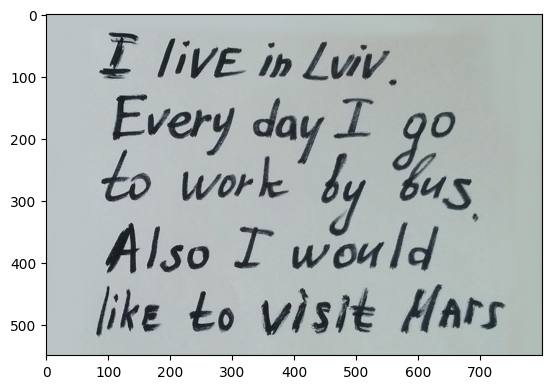

In [60]:
img = cv2.imread('img\\handwritten1.jpg')
img =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

h,w,c = img.shape

if w > 1000:
    new_w = 1000
    ar = w/h
    new_h = int(new_w/ar)
    img = cv2.resize(img,(new_w,new_h),interpolation = cv2.INTER_AREA)
plt.imshow(img)

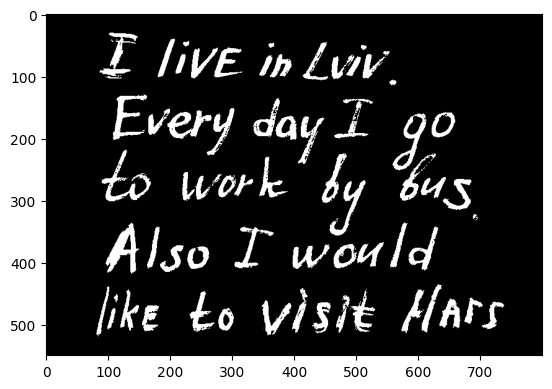

In [61]:
def threasholding(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img_gray,80,255,cv2.THRESH_BINARY_INV)
    plt.imshow(thresh,cmap="gray")
    return thresh
thresh_img = threasholding(img)

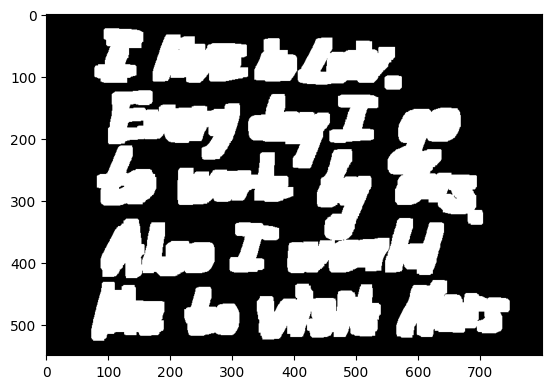

In [68]:
# identify line 
kernel = np.ones((15,18),np.uint16)
dilated = cv2.dilate(thresh_img,kernel,iterations = 1)
plt.imshow(dilated,cmap='gray')

In [69]:
(contours,heirarchy) = cv2.findContours(dilated.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
sorted_contours_lines =sorted(contours,key=lambda ctr:cv2.boundingRect(ctr)[1])

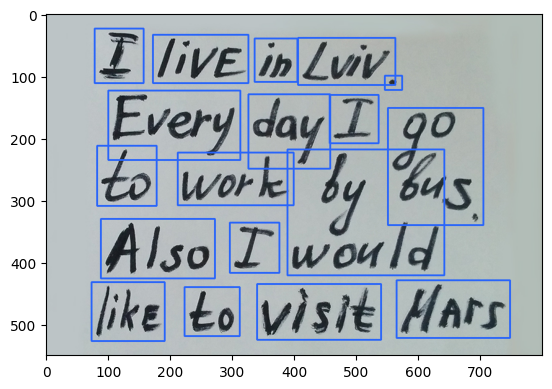

In [70]:
img2 = img.copy()
world_count=[]
for  ctr in sorted_contours_lines:
    x,y,w,h = cv2.boundingRect(ctr)
    world_count.append([x,y,x+w,y+h])
    cv2.rectangle(img2,(x,y),(x+w ,y+h),(40,100,250),2)

plt.imshow(img2)

In [71]:
len(world_count)

18

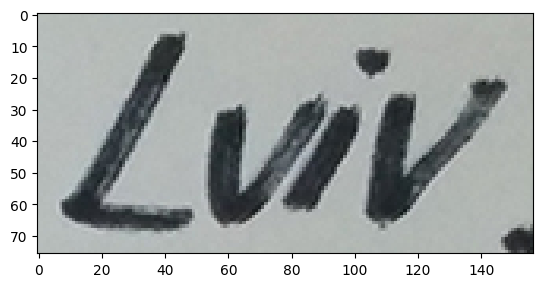

In [72]:
k  = world_count[2]
rotimg = img[k[1]:k[3],k[0]:k[2]]
plt.imshow(rotimg)
